In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from geopy.geocoders import ArcGIS

In [5]:
df = pd.read_csv("NYPD_Arrest_Data__Year_to_Date_.csv")

In [6]:
df.head(5)

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column
0,238013474,12/18/2021,157.0,RAPE 1,104.0,RAPE,PL 1303501,F,Q,105,97,18-24,M,BLACK,1057636,203954,40.726187,-73.735234,POINT (-73.73523390399998 40.72618713000002)
1,236943583,11/25/2021,263.0,"ARSON 2,3,4",114.0,ARSON,PL 1501500,F,K,69,71,25-44,M,BLACK,1014340,171320,40.636868,-73.891586,POINT (-73.89158591899997 40.63686750900007)
2,234938876,10/14/2021,594.0,OBSCENITY 1,116.0,SEX CRIMES,PL 2631100,F,K,61,0,25-44,M,WHITE,995244,155739,40.594145,-73.960415,POINT (-73.96041495199995 40.59414516900005)
3,234788259,10/11/2021,263.0,"ARSON 2,3,4",114.0,ARSON,PL 1501001,F,B,42,71,18-24,M,BLACK,1009058,239616,40.824340,-73.910365,POINT (-73.91036538099996 40.82433953100008)
4,234188790,09/28/2021,578.0,NaN,NaN,NaN,PL 2223001,M,B,44,0,25-44,M,BLACK,1005169,246667,40.843703,-73.924395,POINT (-73.92439508899997 40.84370255600004)


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155507 entries, 0 to 155506
Data columns (total 19 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ARREST_KEY                155507 non-null  int64  
 1   ARREST_DATE               155507 non-null  object 
 2   PD_CD                     155478 non-null  float64
 3   PD_DESC                   155404 non-null  object 
 4   KY_CD                     155404 non-null  float64
 5   OFNS_DESC                 155404 non-null  object 
 6   LAW_CODE                  155507 non-null  object 
 7   LAW_CAT_CD                154114 non-null  object 
 8   ARREST_BORO               155507 non-null  object 
 9   ARREST_PRECINCT           155507 non-null  int64  
 10  JURISDICTION_CODE         155507 non-null  int64  
 11  AGE_GROUP                 155507 non-null  object 
 12  PERP_SEX                  155507 non-null  object 
 13  PERP_RACE                 155507 non-null  o

In [8]:
df.isnull().sum()

ARREST_KEY                     0
ARREST_DATE                    0
PD_CD                         29
PD_DESC                      103
KY_CD                        103
OFNS_DESC                    103
LAW_CODE                       0
LAW_CAT_CD                  1393
ARREST_BORO                    0
ARREST_PRECINCT                0
JURISDICTION_CODE              0
AGE_GROUP                      0
PERP_SEX                       0
PERP_RACE                      0
X_COORD_CD                     0
Y_COORD_CD                     0
Latitude                       0
Longitude                      0
New Georeferenced Column       0
dtype: int64

In [6]:
df.select_dtypes(include=["number"])

,ARREST_KEY,PD_CD,KY_CD,ARREST_PRECINCT,JURISDICTION_CODE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude
0,238013474,157.0,104.0,105,97,1057636,203954,40.726187,-73.735234
1,236943583,263.0,114.0,69,71,1014340,171320,40.636868,-73.891586
2,234938876,594.0,116.0,61,0,995244,155739,40.594145,-73.960415
3,234788259,263.0,114.0,42,71,1009058,239616,40.824340,-73.910365
4,234188790,578.0,NaN,44,0,1005169,246667,40.843703,-73.924395
...,...,...,...,...,...,...,...,...,...
155502,222884924,397.0,105.0,46,0,1011432,247605,40.846260,-73.901755
155503,223918625,792.0,118.0,67,0,1004940,180941,40.663302,-73.925425
155504,224323770,101.0,344.0,121,0,942825,166367,40.623227,-74.149227
155505,222599533,792.0,118.0,73,0,1007524,188555,40.684194,-73.916085


In [7]:
df.select_dtypes(include=["object"])

,ARREST_DATE,PD_DESC,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,AGE_GROUP,PERP_SEX,PERP_RACE,New Georeferenced Column
0,12/18/2021,RAPE 1,RAPE,PL 1303501,F,Q,18-24,M,BLACK,POINT (-73.73523390399998 40.72618713000002)
1,11/25/2021,"ARSON 2,3,4",ARSON,PL 1501500,F,K,25-44,M,BLACK,POINT (-73.89158591899997 40.63686750900007)
2,10/14/2021,OBSCENITY 1,SEX CRIMES,PL 2631100,F,K,25-44,M,WHITE,POINT (-73.96041495199995 40.59414516900005)
3,10/11/2021,"ARSON 2,3,4",ARSON,PL 1501001,F,B,18-24,M,BLACK,POINT (-73.91036538099996 40.82433953100008)
4,09/28/2021,NaN,NaN,PL 2223001,M,B,25-44,M,BLACK,POINT (-73.92439508899997 40.84370255600004)
...,...,...,...,...,...,...,...,...,...,...
155502,01/10/2021,"ROBBERY,OPEN AREA UNCLASSIFIED",ROBBERY,PL 1601001,F,B,45-64,M,BLACK,POINT (-73.90175529499999 40.846260031000035)
155503,02/03/2021,WEAPONS POSSESSION 1 & 2,DANGEROUS WEAPONS,PL 2650303,F,K,18-24,M,BLACK,POINT (-73.92542497899994 40.66330200400005)
155504,02/13/2021,ASSAULT 3,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,S,45-64,M,BLACK,POINT (-74.14922697299994 40.623226819000074)
155505,01/04/2021,WEAPONS POSSESSION 1 & 2,DANGEROUS WEAPONS,PL 2650303,F,K,25-44,M,BLACK,POINT (-73.91608474599997 40.684194302000044)


In [8]:
df["OFNS_DESC"].unique()

array(['RAPE', 'ARSON', 'SEX CRIMES', nan, 'ASSAULT 3 & RELATED OFFENSES',
       'FELONY ASSAULT', 'DANGEROUS WEAPONS', 'MISCELLANEOUS PENAL LAW',
       'PETIT LARCENY', 'GRAND LARCENY OF MOTOR VEHICLE',
       'DANGEROUS DRUGS', 'NYS LAWS-UNCLASSIFIED FELONY', 'GRAND LARCENY',
       'OTHER OFFENSES RELATED TO THEF',
       'PROSTITUTION & RELATED OFFENSES',
       'OFFENSES AGAINST PUBLIC ADMINI', 'ROBBERY',
       'FOR OTHER AUTHORITIES', 'CRIMINAL MISCHIEF & RELATED OF',
       'OTHER TRAFFIC INFRACTION', 'FORGERY',
       'INTOXICATED & IMPAIRED DRIVING', 'MURDER & NON-NEGL. MANSLAUGHTE',
       'UNAUTHORIZED USE OF A VEHICLE', 'BURGLARY',
       'OFFENSES INVOLVING FRAUD', 'VEHICLE AND TRAFFIC LAWS',
       'OFF. AGNST PUB ORD SENSBLTY &', 'THEFT OF SERVICES',
       'CRIMINAL TRESPASS', 'POSSESSION OF STOLEN PROPERTY',
       'OTHER STATE LAWS (NON PENAL LA', 'FRAUDULENT ACCOSTING',
       'OFFENSES AGAINST THE PERSON', 'FRAUDS', 'OTHER STATE LAWS',
       'THEFT-FRAUD', 'INTO

In [9]:
pd.DataFrame(df.OFNS_DESC.value_counts())

,OFNS_DESC
ASSAULT 3 & RELATED OFFENSES,26855
FELONY ASSAULT,15579
PETIT LARCENY,13178
DANGEROUS DRUGS,10450
MISCELLANEOUS PENAL LAW,10328
...,...
PARKING OFFENSES,3
ADMINISTRATIVE CODES,2
FELONY SEX CRIMES,2
KIDNAPPING AND RELATED OFFENSES,1


<AxesSubplot:title={'center':'Top 10 Crimes commited'}>

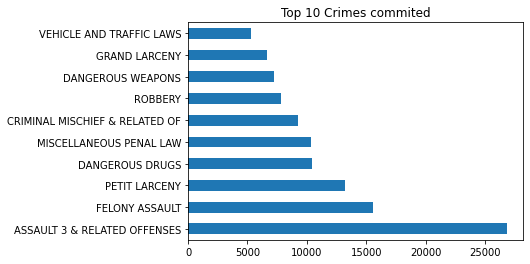

In [10]:
(df.OFNS_DESC.value_counts().nlargest(10)).plot(kind='barh', title="Top 10 Crimes commited")

In [31]:
df.loc[:,'Latitude'].value_counts()

40.671412    1272
40.887333    1191
40.810398    1067
40.680049     889
40.769561     866
             ... 
40.698925       1
40.745242       1
40.869854       1
40.658276       1
40.751932       1
Name: Latitude, Length: 34210, dtype: int64

In [32]:
df.loc[:,'Longitude'].value_counts()

-73.881512    1272
-73.847250    1191
-73.924895    1067
-73.775909     889
-73.915363     866
              ... 
-73.941232       1
-73.894253       1
-73.915872       1
-73.996628       1
-73.859384       1
Name: Longitude, Length: 34210, dtype: int64

In [33]:
df.loc[:,'New Georeferenced Column'].value_counts()

POINT (-73.88151172399995 40.67141166300007)     1272
POINT (-73.84725001299995 40.88733281800006)     1191
POINT (-73.92489531099994 40.810398494000026)    1067
POINT (-73.77590919399995 40.680048726000045)     889
POINT (-73.91536344699995 40.76956124200007)      866
                                                 ... 
POINT (-73.94937698999998 40.77688495700004)        1
POINT (-73.95415853799993 40.60745511400006)        1
POINT (-73.88979626899999 40.84349079400005)        1
POINT (-74.12339453299995 40.61917593900005)        1
POINT (-73.85938445399995 40.75193190600004)        1
Name: New Georeferenced Column, Length: 34217, dtype: int64

In [180]:
crime_group=df.groupby(["OFNS_DESC"])["New Georeferenced Column"].value_counts()

In [181]:
crime_group

OFNS_DESC                 New Georeferenced Column                     
ADMINISTRATIVE CODE       POINT (-73.76742395499997 40.76015718700007)     3
                          POINT (-73.92489531099994 40.810398494000026)    3
                          POINT (-73.96373101899997 40.76690500600006)     3
                          POINT (-73.98615855199995 40.689027417000034)    3
                          POINT (-73.82140047499998 40.68731964800003)     2
                                                                          ..
VEHICLE AND TRAFFIC LAWS  POINT (-74.23897170899994 40.53275994900008)     1
                          POINT (-74.23923232899993 40.523158008000046)    1
                          POINT (-74.24459376699998 40.50798153200003)     1
                          POINT (-74.24702354499993 40.50376575800004)     1
                          POINT (-74.24934957199997 40.513271564000036)    1
Name: New Georeferenced Column, Length: 70398, dtype: int64

In [87]:
df2= pd.read_csv("Crime.csv")
df2

,OFNS_DESC,New Georeferenced Column,New Georeferenced Column.1
0,ADMINISTRATIVE CODE,POINT (-73.76742395499997 40.76015718700007),3
1,ADMINISTRATIVE CODE,POINT (-73.92489531099994 40.810398494000026),3
2,ADMINISTRATIVE CODE,POINT (-73.96373101899997 40.76690500600006),3
3,ADMINISTRATIVE CODE,POINT (-73.98615855199995 40.689027417000034),3
4,ADMINISTRATIVE CODE,POINT (-73.82140047499998 40.68731964800003),2
...,...,...,...
70393,VEHICLE AND TRAFFIC LAWS,POINT (-74.23897170899994 40.53275994900008),1
70394,VEHICLE AND TRAFFIC LAWS,POINT (-74.23923232899993 40.523158008000046),1
70395,VEHICLE AND TRAFFIC LAWS,POINT (-74.24459376699998 40.50798153200003),1
70396,VEHICLE AND TRAFFIC LAWS,POINT (-74.24702354499993 40.50376575800004),1


In [89]:
df2 = df2.rename(columns={"New Georeferenced Column.1":"Crime Count"})

In [84]:
df2["New Georeferenced Column"] = df2["New Georeferenced Column"].replace("POINT", " ")
df2

0         POINT (-73.76742395499997 40.76015718700007)
1        POINT (-73.92489531099994 40.810398494000026)
2         POINT (-73.96373101899997 40.76690500600006)
3        POINT (-73.98615855199995 40.689027417000034)
4         POINT (-73.82140047499998 40.68731964800003)
                             ...                      
70393     POINT (-74.23897170899994 40.53275994900008)
70394    POINT (-74.23923232899993 40.523158008000046)
70395     POINT (-74.24459376699998 40.50798153200003)
70396     POINT (-74.24702354499993 40.50376575800004)
70397    POINT (-74.24934957199997 40.513271564000036)
Name: New Georeferenced Column, Length: 70398, dtype: object

In [75]:
df2["New Georeferenced Column"].str.split('(' , n=1 )

0         [POINT , -73.76742395499997 40.76015718700007)]
1        [POINT , -73.92489531099994 40.810398494000026)]
2         [POINT , -73.96373101899997 40.76690500600006)]
3        [POINT , -73.98615855199995 40.689027417000034)]
4         [POINT , -73.82140047499998 40.68731964800003)]
                               ...                       
70393     [POINT , -74.23897170899994 40.53275994900008)]
70394    [POINT , -74.23923232899993 40.523158008000046)]
70395     [POINT , -74.24459376699998 40.50798153200003)]
70396     [POINT , -74.24702354499993 40.50376575800004)]
70397    [POINT , -74.24934957199997 40.513271564000036)]
Name: New Georeferenced Column, Length: 70398, dtype: object

In [90]:
df2

,OFNS_DESC,New Georeferenced Column,Crime Count
0,ADMINISTRATIVE CODE,POINT (-73.76742395499997 40.76015718700007),3
1,ADMINISTRATIVE CODE,POINT (-73.92489531099994 40.810398494000026),3
2,ADMINISTRATIVE CODE,POINT (-73.96373101899997 40.76690500600006),3
3,ADMINISTRATIVE CODE,POINT (-73.98615855199995 40.689027417000034),3
4,ADMINISTRATIVE CODE,POINT (-73.82140047499998 40.68731964800003),2
...,...,...,...
70393,VEHICLE AND TRAFFIC LAWS,POINT (-74.23897170899994 40.53275994900008),1
70394,VEHICLE AND TRAFFIC LAWS,POINT (-74.23923232899993 40.523158008000046),1
70395,VEHICLE AND TRAFFIC LAWS,POINT (-74.24459376699998 40.50798153200003),1
70396,VEHICLE AND TRAFFIC LAWS,POINT (-74.24702354499993 40.50376575800004),1


In [92]:
df2.to_csv("Crime1.csv")

In [156]:
df3 = pd.read_csv("Crime1.csv")

In [157]:
df3

,Unnamed: 0,OFNS_DESC,New Georeferenced Column,Crime Count
0,0,ADMINISTRATIVE CODE,POINT (-73.76742395499997 40.76015718700007),3
1,1,ADMINISTRATIVE CODE,POINT (-73.92489531099994 40.810398494000026),3
2,2,ADMINISTRATIVE CODE,POINT (-73.96373101899997 40.76690500600006),3
3,3,ADMINISTRATIVE CODE,POINT (-73.98615855199995 40.689027417000034),3
4,4,ADMINISTRATIVE CODE,POINT (-73.82140047499998 40.68731964800003),2
...,...,...,...,...
70393,70393,VEHICLE AND TRAFFIC LAWS,POINT (-74.23897170899994 40.53275994900008),1
70394,70394,VEHICLE AND TRAFFIC LAWS,POINT (-74.23923232899993 40.523158008000046),1
70395,70395,VEHICLE AND TRAFFIC LAWS,POINT (-74.24459376699998 40.50798153200003),1
70396,70396,VEHICLE AND TRAFFIC LAWS,POINT (-74.24702354499993 40.50376575800004),1


In [158]:
df3["New Georeferenced Column"] = df3["New Georeferenced Column"].str.replace("POINT", "")

In [159]:
df3["New Georeferenced Column"] = df3["New Georeferenced Column"].str.replace(" ", "", n=1)

In [164]:
test2 = df3["New Georeferenced Column"].str.split(' ', n=1, expand=True).rename(columns={0:"Longitude", 1:"Latitude"})

In [165]:
test2

,Longitude,Latitude
0,(-73.76742395499997,40.76015718700007)
1,(-73.92489531099994,40.810398494000026)
2,(-73.96373101899997,40.76690500600006)
3,(-73.98615855199995,40.689027417000034)
4,(-73.82140047499998,40.68731964800003)
...,...,...
70393,(-74.23897170899994,40.53275994900008)
70394,(-74.23923232899993,40.523158008000046)
70395,(-74.24459376699998,40.50798153200003)
70396,(-74.24702354499993,40.50376575800004)


In [166]:
data4 = pd.concat([df2,test2], axis = "columns").reset_index(drop=True)

In [167]:
data4

,OFNS_DESC,New Georeferenced Column,Crime Count,Longitude,Latitude
0,ADMINISTRATIVE CODE,POINT (-73.76742395499997 40.76015718700007),3,(-73.76742395499997,40.76015718700007)
1,ADMINISTRATIVE CODE,POINT (-73.92489531099994 40.810398494000026),3,(-73.92489531099994,40.810398494000026)
2,ADMINISTRATIVE CODE,POINT (-73.96373101899997 40.76690500600006),3,(-73.96373101899997,40.76690500600006)
3,ADMINISTRATIVE CODE,POINT (-73.98615855199995 40.689027417000034),3,(-73.98615855199995,40.689027417000034)
4,ADMINISTRATIVE CODE,POINT (-73.82140047499998 40.68731964800003),2,(-73.82140047499998,40.68731964800003)
...,...,...,...,...,...
70393,VEHICLE AND TRAFFIC LAWS,POINT (-74.23897170899994 40.53275994900008),1,(-74.23897170899994,40.53275994900008)
70394,VEHICLE AND TRAFFIC LAWS,POINT (-74.23923232899993 40.523158008000046),1,(-74.23923232899993,40.523158008000046)
70395,VEHICLE AND TRAFFIC LAWS,POINT (-74.24459376699998 40.50798153200003),1,(-74.24459376699998,40.50798153200003)
70396,VEHICLE AND TRAFFIC LAWS,POINT (-74.24702354499993 40.50376575800004),1,(-74.24702354499993,40.50376575800004)


In [179]:
data4.to_csv("Crime4.csv")

In [ ]:
data4["Longitude"] = data4["Longitude"].replace('(', " ")


In [1]:
df.isnull().sum()

NameError: name 'df' is not defined

In [11]:
df["PERP_SEX"].value_counts()

M    128910
F     26597
Name: PERP_SEX, dtype: int64

In [19]:
dataset = df.groupby('PERP_SEX')['ARREST_BORO'].value_counts()

In [26]:
dataset

PERP_SEX  ARREST_BORO
F         K               6894
          M               6677
          B               6131
          Q               5611
          S               1284
M         K              34656
          M              33000
          B              27887
          Q              27440
          S               5927
Name: ARREST_BORO, dtype: int64

In [55]:
indx = np.arange(len(df['ARREST_BORO'].unique()))

In [56]:
crime_label = np.arange(1000, 37000)

In [57]:
male_total = list(dataset.T['M'])

In [58]:
female_total = list(dataset.T['F'])

In [59]:
bar_width = 0.35

C:\Users\tbara\AppData\Local\Temp\ipykernel_4464\2875752483.py:3: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  bar_male = ax.bar(indx - bar_width/2, male_total, bar_width, Label = "Male Total")
C:\Users\tbara\AppData\Local\Temp\ipykernel_4464\2875752483.py:5: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  bar_female = ax.bar(indx + bar_width/2, female_total, bar_width, Label = "Female Total")


ConversionError: Failed to convert value(s) to axis units: 0         M
1         M
2         M
3         M
4         M
         ..
155502    M
155503    M
155504    M
155505    M
155506    M
Name: PERP_SEX, Length: 155507, dtype: object

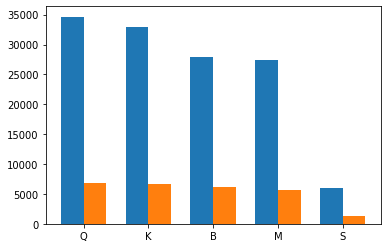

In [70]:
fig, ax = plt.subplots()

bar_male = ax.bar(indx - bar_width/2, male_total, bar_width, Label = "Male Total")

bar_female = ax.bar(indx + bar_width/2, female_total, bar_width, Label = "Female Total")


ax.set_xticks(indx)
ax.set_xticklabels(df["ARREST_BORO"].unique())

ax.set_yticks(df['PERP_SEX'])
ax.set_yticklabels(df["PERP_SEX"].unique())

ax.legend()


plt.show()

<AxesSubplot:xlabel='ARREST_BORO', ylabel='PERP_SEX'>

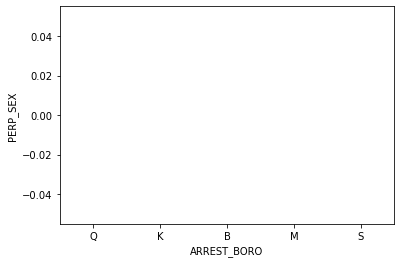

In [76]:
sns.barplot(x=df["ARREST_BORO"], y=df["PERP_SEX"].value_counts(), data=df)

In [79]:
boro_list = list(df["ARREST_BORO"].unique())

In [80]:
boro_list

['Q', 'K', 'B', 'M', 'S']

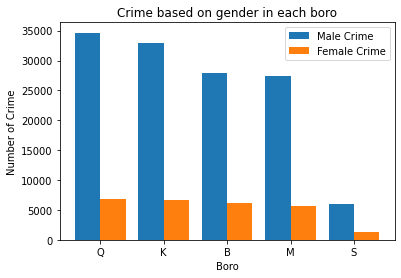

In [83]:
X = boro_list
male_crime = list(dataset.T['M'])
female_crime = list(dataset.T['F'])
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, male_crime, 0.4, label = 'Male Crime')
plt.bar(X_axis + 0.2, female_crime, 0.4, label = 'Female Crime')
  
plt.xticks(X_axis, X)
plt.xlabel("Boro")
plt.ylabel("Number of Crime")
plt.title("Crime based on gender in each boro")
plt.legend()
plt.show()

In [86]:
df = df.replace({'S':"Staten Island"})

In [88]:
df = df.replace({'M':'Male', 'F':'Female'})


In [89]:
df

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column
0,238013474,12/18/2021,157.0,RAPE 1,104.0,RAPE,PL 1303501,Female,Queens,105,97,18-24,Male,BLACK,1057636,203954,40.726187,-73.735234,POINT (-73.73523390399998 40.72618713000002)
1,236943583,11/25/2021,263.0,"ARSON 2,3,4",114.0,ARSON,PL 1501500,Female,K,69,71,25-44,Male,BLACK,1014340,171320,40.636868,-73.891586,POINT (-73.89158591899997 40.63686750900007)
2,234938876,10/14/2021,594.0,OBSCENITY 1,116.0,SEX CRIMES,PL 2631100,Female,K,61,0,25-44,Male,WHITE,995244,155739,40.594145,-73.960415,POINT (-73.96041495199995 40.59414516900005)
3,234788259,10/11/2021,263.0,"ARSON 2,3,4",114.0,ARSON,PL 1501001,Female,B,42,71,18-24,Male,BLACK,1009058,239616,40.824340,-73.910365,POINT (-73.91036538099996 40.82433953100008)
4,234188790,09/28/2021,578.0,NaN,NaN,NaN,PL 2223001,Male,B,44,0,25-44,Male,BLACK,1005169,246667,40.843703,-73.924395,POINT (-73.92439508899997 40.84370255600004)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155502,222884924,01/10/2021,397.0,"ROBBERY,OPEN AREA UNCLASSIFIED",105.0,ROBBERY,PL 1601001,Female,B,46,0,45-64,Male,BLACK,1011432,247605,40.846260,-73.901755,POINT (-73.90175529499999 40.846260031000035)
155503,223918625,02/03/2021,792.0,WEAPONS POSSESSION 1 & 2,118.0,DANGEROUS WEAPONS,PL 2650303,Female,K,67,0,18-24,Male,BLACK,1004940,180941,40.663302,-73.925425,POINT (-73.92542497899994 40.66330200400005)
155504,224323770,02/13/2021,101.0,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,Male,Staten Island,121,0,45-64,Male,BLACK,942825,166367,40.623227,-74.149227,POINT (-74.14922697299994 40.623226819000074)
155505,222599533,01/04/2021,792.0,WEAPONS POSSESSION 1 & 2,118.0,DANGEROUS WEAPONS,PL 2650303,Female,K,73,0,25-44,Male,BLACK,1007524,188555,40.684194,-73.916085,POINT (-73.91608474599997 40.684194302000044)
